# Markov chain algorithm

# Task Description
1. Write a program that learns to play "rock, paper, scissors". Use a Markov chain algorithm with a transition matrix between three states (Rock, Paper, Scissors) as the learning algorithm. The learning process involves updating the transition matrix based on conditional probabilities of state changes.
2. The payout value: 1 in the case of a win, -1 in the case of a loss, and 0 in the case of a tie.
3. Conduct a series of several rounds of "rock, paper, scissors" games. Create a chart showing how the cash state changes at each game step.

# Opis zadania
1. Napisz program, uczący się gry “papier, kamień, nożyce”. Jako algorytm uczący zastosuj łańcuch Markowa z macierzą przejść pomiędzy trzema stanami (Papier, Kamień, Nożyce). Nauka gry polega na korekcie macierzy przejść (prawdopodobieństwa warunkowe zmiany stanu),
2. Wartość wypłaty: 1 w przypadku wygranej, −1 w przypadku przegranej i 0 w przypadku remisu,
3. Przeprowadź ciąg kilkudziesięciu gier “kamień, papier, nożyce”. Sporząź wykres jak zmienia się stan kasy w każdym kroku gry.

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# initial state - represents the initial move
state_player = random.randint(0, 2)  # Randomly choose a state for the player
state_computer = random.randint(0, 2)  # Randomly choose a state for the computer

# Markov chain transition matrices
markov_chain_player = np.array([[1, 1, 1],  # Transition matrix for the player's moves
                                [1, 1, 1],
                                [1, 1, 1]])
markov_chain_computer = np.array([[1, 1, 1],  # Transition matrix for the computer's moves
                                  [1, 1, 1],
                                  [1, 1, 1]])

# Probability matrices for player and computer moves
p_player = pd.DataFrame({'r': [0.33, 0.33, 0.34],  # Probability matrix for player's moves (Rock, Paper, Scissors)
                         'p': [0.33, 0.33, 0.34],
                         's': [0.33, 0.33, 0.34]},
                        index=['r', 'p', 's'])
p_computer = pd.DataFrame({'r': [0.33, 0.33, 0.34],  # Probability matrix for computer's moves (Rock, Paper, Scissors)
                           'p': [0.33, 0.33, 0.34],
                           's': [0.33, 0.33, 0.34]},
                          index=['r', 'p', 's'])

# Result matrix indicating the outcome of player-computer matches
result_matrix = np.array([[0, -1, 1],  # 0 represents a tie, -1 represents a loss, 1 represents a win
                          [1, 0, -1],
                          [-1, 1, 0]])

# initial cash
cash_player = 0  # Initial cash for the player
cash_computer = 0  # Initial cash for the computer

# cash history
cash_history_player = list()  # List to store the history of player's cash at each step
cash_history_computer = list()  # List to store the history of computer's cash at each step

In [5]:
for i in range(100):
    # Player's move
    player_move = np.random.choice(3, 1, p=markov_chain_player[state_player, :].ravel() / markov_chain_player[state_player].sum())
    markov_chain_player[state_player, player_move] += 1

    # Computer's move
    computer_move = np.random.choice(3, 1, p=markov_chain_computer[state_computer, :].ravel() / markov_chain_computer[state_computer].sum())
    markov_chain_computer[state_computer, computer_move] += 1

    # Update cash
    cash_player += result_matrix[player_move, computer_move][0]
    cash_computer += result_matrix[computer_move, player_move][0]

    # Update state
    state_player = player_move
    state_computer = computer_move

    # Save cash history
    cash_history_player.append(cash_player)
    cash_history_computer.append(cash_computer)

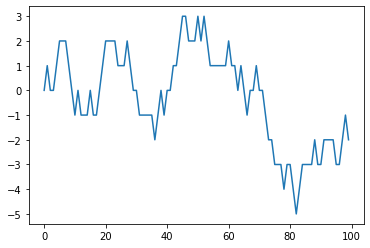

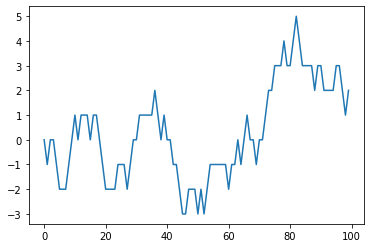

In [6]:
# Plot cash history
plt.plot(cash_history_player, label='player')
plt.show()
plt.plot(cash_history_computer, label='computer')
plt.show()